# **2022년 빅데이터 동아리 특강 - 토픽 모델링 (2022년 5월 30일)**

대학원 기술경영학과 (Management of Technology) - 송지훈 교수

🧑👩 학생 여러분, 빅데이터 동아리에 오신걸 환영합니다 !\
짧은 시간이지만, 여러분들이 다양한 특강을 기반으로 **스스로 학습** 및 **경진대회**에 **참가** 할 수 있는 **역량**을 갖출 수 있도록 지원하는게 주 목적 입니다.

**나중을 위한 팁**\
✅ You can only learn data science by doing data science. (실제로 코드를 구현해 봐야 합니다 ~) \
✅ Practice, practice, practice. (연습하고 또 연습하세요, 이번 짧은 강의에서는 모든 세세한 내용을 전부 다룰수 없습니다 ~)\
✅ Free resources everywhere. (인터넷상에는 무료로 데이터 분석 또는 프로그래밍 관련 공부를 할 수 있는 많은 자료들이 존재 합니다. 적극적으로 찾아서 이용하세요 ~)

# **한국어 데이터를 사용하기 위한 준비작업**

시각화하는데 폰트가 깨져서 나오지 않게 하기 위한 사전작업.

In [ ]:
# "나눔폰트"를 인스톨
!apt -qq -y install fonts-nanum

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
print(nanum_font)

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

**가끔 이렇게 설정을 해도, 폰트가 깨져서 나오는 경우가 있기 때문에, 여기서 런타임을 재시작 해주는게 좋다.**

# **공공데이터 분석 1**

## **공공데이터란?**

공공데이터란 공공기관이 만들어내는 모든 자료나 정보, 국민 모두의 소통과 협력을 이끌어내는 공적인 정보를 말합니다. 각 공공기관이 보유한 공공데이터 목록과 국민에게 개방할 수 있는 공공데이터를 포털에 등록하면 모두가 공유할 수 있는 양질의 공공데이터로 재탄생하게 됩니다.

(누구나 이용가능한 데이터.)

https://www.data.go.kr/ugs/selectPublicDataUseGuideView.do (보다 자세한 내용은 이곳을 참조)

**상권정보 분석**

https://www.data.go.kr/ (국가에서 제공하는 공공데이터포털)

https://www.data.go.kr/data/15083033/fileData.do (여기서 데이터 다운)

## **필요한 라이브러리 로드**

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None) # 모든 데이터열(column)을 보여주게 하는 기능
import numpy as np
import seaborn as sns # 그래프를 그리는데 필요한 라이브러리
import matplotlib.pyplot as plt # 그래프를 그리는데 필요한 라이브러리
import folium # 지도를 그리는데 필요한 라이브러리
# 라이브러리: 특정 기능들(함수, 변수, 클래쓰)이 구현되어 있는 파이썬 파일

## **경남의 상권정보를 이용**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/텍스트마이닝_동아리/데이터_동아리/소상공인시장진흥공단_상가(상권)정보_경남_202203.csv")

In [ ]:
df.head() # 데이터의 앞 부분 첫 5개의 행을 출력

In [ ]:
df.shape # 데이터의 형태를 나타냄 (행과 열): 총 150121 행과 39개의 열로 이루어진 데이터

In [ ]:
# info()를 사용해 데이터 프레임의 기본 정보를 출력
df.info() # 여기서 잘못된 부분은?

In [ ]:
df['상가업소번호'] = df['상가업소번호'].astype(str) # 상가업소번호는 고유번호 이기에, 문자열로 전환
df['시도코드'] = df['시도코드'].astype(str) 
df['시군구코드'] = df['시군구코드'].astype(str)

In [ ]:
df['numbers'] = "1" # numbers라는 컬럼을 만든 후에, 값으로 1을 할당. 설명은 나중에 ~

In [ ]:
df.isnull().sum() # 결측값이 있는지 확인 (0인 경우 결측값이 없음)

In [ ]:
# describe()을 사용해서, 요약 통계량을 출력 (숫자형 데이터를 대상)
df.describe() # 하지만, 대부분이 필요 없는 부분이 요약됨

In [ ]:
# 리스트에 컬럼명 (name of columns) 저장
cols = df.columns.tolist() # 굉장히 직관적인 문법 (이런 포인트가 파이썬의 장점)

In [ ]:
print(cols)

## **진주시 상권 데이터만 추출**

reset_index(drop=True)의 역할: index의 순서를 재정렬 해주며, 기존의 index는 제거를 해준다.

In [ ]:
# reset_index를 사용하지 않은 경우
df[df['시군구명'] =='진주시']

In [ ]:
# reset_index를 사용하는 경우
jinju = df[df['시군구명'] =='진주시'].reset_index(drop=True)
jinju

In [ ]:
jinju['지점명'].head(10) # 큰 의미는 없는 데이터로 생각

In [ ]:
jinju.loc[jinju['지점명']=='경상대점'] # 프렌차이즈의 지점명 (그렇게 중요한 데이터는 아니라고 판단)

In [ ]:
# unique()을 이용하면 컬럼내 유니크한 값들을 찾을 수 있음
jinju['표준산업분류코드'].unique()

In [ ]:
jinju['표준산업분류명'].unique()

nunique()을 사용하면, 고유값이 몇 개인지를 반환해준다.

In [ ]:
jinju['표준산업분류명'].nunique()

In [ ]:
jinju['표준산업분류코드'].nunique()

http://kssc.kostat.go.kr/ksscNew_web/kssc/common/ClassificationContent.do?gubun=1&strCategoryNameCode=001&categoryMenu=007 (표준산업분류코드 검색)

## **분류가 되지 않은 업소들은 어떤 업소들일까?**

In [ ]:
no_class = jinju.loc[jinju['표준산업분류명'].isnull()]
no_class

In [ ]:
no_class['상권업종소분류명'].value_counts()

In [ ]:
jinju[jinju['상권업종소분류명'] == '자동차정비/카센타']

## **결측치 확인하기**

In [ ]:
jinju.isnull().sum()

In [ ]:
jinju[jinju['행정동명'].isnull()]

In [ ]:
jinju[jinju['법정동명'] == '하대동'] # 법정동명과 행정동명이 같음

In [ ]:
jinju[jinju['법정동명'] == '상대동'] # 법정동명과 행정동명이 같음

In [ ]:
# 다른 컬럼을 이용해서 결측치를 대체
# fillna() 함수를 사용
jinju['행정동명'] = jinju['행정동명'].fillna(value=jinju['법정동명'])

In [ ]:
jinju.isnull().sum()

In [ ]:
jinju['지번부번지'] # 없어도 상관 없는 데이터로 판단

In [ ]:
jinju['건물명'] # 중요하지 않은 정보

In [ ]:
jinju['동정보']  # 없어도 크게 상관이 없는 데이터로 판단

결측치가 많이 보이지만, 분석을 하는데 크게 지장을 주는 데이터가 아니기 때문에, 특별한 처리 없이 진행.

## **진주시내 주요 업종 확인**

groupby()를 이용하면, 같은 카테고리의 값들을 묶어서 표현이 가능.

(굉장히 중요한 내용 중 하나) 일반적으로 categorical data(범주형 자료)가 있을 경우, 카테고리 별로 데이터를 그룹화하기 위해 사용\
다양한 표기 방법이 존재하며, 데이터 요약 및 정리에 유용한 기능

In [ ]:
jinju.groupby('상권업종대분류명').size().reset_index(name = 'count')

In [ ]:
jinju.groupby('상권업종대분류명').size().reset_index(name = 'count').sort_values(['count'],ascending=False)

In [ ]:
main_category = jinju.groupby('상권업종대분류명').size().reset_index(name = 'count').sort_values(['count'],ascending=False)
main_category

In [ ]:
sub_category = jinju.groupby('상권업종중분류명').size().reset_index(name = 'count').sort_values(['count'],ascending=False)
sub_category

In [ ]:
# 가장 많은 업소가 속하는 소분류명 Top 20
micro_segmentation = jinju.groupby('상권업종소분류명').size().reset_index(name = 'count').sort_values(['count'],ascending=False).head(20)
micro_segmentation

In [ ]:
 jinju.groupby(['상권업종대분류명','상권업종소분류명']).size().reset_index(name = 'count').sort_values(['count'],ascending=False).head(20)

**x축과 y축에 어떤 데이터 값을 부여하느냐에 따라, 다른 시각화 가능.**

In [ ]:
plt.figure(figsize=(12,6)) # 크기를 설정
sns.barplot(x='count',y='상권업종소분류명',data=micro_segmentation, palette='YlGnBu_r') # barplot 막대 그래프
plt.xlabel("", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("상권업종소분류명", fontweight='bold',fontsize= 15, labelpad = 25)
plt.title(f"진주시내 주요 업종 Top 20", fontweight='bold', pad=15, fontsize=15)
plt.xticks(fontsize = 13, rotation = 0) # rotation을통해 x축에 있는 label의 방향을 조정할 수 있다.
plt.yticks(fontsize = 13)  

## **커피전문점 검색**

In [ ]:
starbucks = jinju.loc[jinju['상호명'].str.contains("스타벅스")].reset_index(drop=True)
print(f"진주에는 총 {len(starbucks)}개 스타벅스 지점이 있다") 

In [ ]:
starbucks.head()

In [ ]:
ediya = jinju.loc[jinju['상호명'].str.contains("이디야")].reset_index(drop=True)
print(f"진주에는 총 {len(ediya)}개 이디야 지점이 있다") 

In [ ]:
ediya.head()

In [ ]:
baeks = jinju.loc[jinju['상호명'].str.contains("빽다방")].reset_index(drop=True)
print(f"진주에는 총 {len(baeks)}개 빽다방 지점이 있다") 

In [ ]:
baeks.head()

## **베스킨라빈스는 어떤 업종으로 분류가 되었을까?**

In [ ]:
# 베스킨|배스킨 의 의미는" 베스킨 or 배스킨
baskin = jinju.loc[jinju['상호명'].str.contains("베스킨|배스킨")].reset_index(drop=True)
print(f"진주에는 총 {len(baskin)}개 베라지점이 있다") 
baskin

## **진주시내 커피전문점 분포에 대해 분석해보자.**

In [ ]:
coffee_shops = jinju.loc[jinju['상권업종소분류코드'] == 'Q12A01'].reset_index(drop=True)
print(f"진주에는 총 {len(coffee_shops)}개의 커피숍이 있다") 

**value_counts()를 써서 어떤 브래드 커피점이 많은지 확인해보기**

In [ ]:
coffee_shops['상호명'].value_counts() # 카테고리 값별로 데이터의 수를 출력

In [ ]:
# 더 깔끔한 데이터 프레임 형식으로 만들어 주는 과정
# groupby로도 가능하며, groupby가 작성 시, 한 줄로 작성 가능
coffee_stores = coffee_shops['상호명'].value_counts().reset_index()
coffee_stores

In [ ]:
coffee_stores.columns = ['상호명','Count']
coffee_stores.head(20)

In [ ]:
jinju.loc[jinju['상호명'] =='카페'] # 특별한 상호가 없는 카페이거나, 다른 공간안에 입점해 있느 카페?. (다른 의견이 있다면 말해주세요.)

In [ ]:
starbucks['상호명'].unique()

In [ ]:
ediya['상호명'].unique()

In [ ]:
baeks['상호명'].unique()

## **딕셔너리 생성**

In [ ]:
starbucks_name_list = list(starbucks['상호명'].unique())
starbucks_name_list

dictionary = {'스타벅스진주신안': "스타벅스"}

In [ ]:
# 딕셔너리를 생성 하는 이유: 딕셔너리를 이용해서, 상호명이 스타벅스가 아닌 기업들을 스타벅스로 대체시키기 위해
starbucks_dictionary = {} # 빈 딕셔너리 생성
for name in starbucks_name_list:
  if name != "스타벅스":
    starbucks_dictionary[name] = '스타벅스'

In [ ]:
starbucks_dictionary # 딕셔너리를 만든 후, 이걸 이용해서 스타벅스로 통일되게 바꾸어 주는 작업

In [ ]:
ediya_name_list = list(ediya['상호명'].unique())
ediya_name_list

In [ ]:
ediya_dictionary = {} # 빈 딕셔너리 생성
for name in ediya_name_list:
  if name != "이디야커피":
    ediya_dictionary[name] = '이디야커피'

In [ ]:
ediya_dictionary

In [ ]:
baeks_name_list = list(baeks['상호명'].unique())
baeks_name_list

In [ ]:
baeks_dictionary = {} # 빈 딕셔너리 생성
for name in baeks_name_list:
  if name != "빽다방":
    baeks_dictionary[name] = '빽다방'

In [ ]:
baeks_dictionary

**딕셔너리 합치기**

In [ ]:
starbucks_dictionary.update(ediya_dictionary)
starbucks_dictionary

In [ ]:
starbucks_dictionary.update(baeks_dictionary)
starbucks_dictionary

## **딕셔너리와 apply()**

In [ ]:
if "이디야커피개양오거리점" in starbucks_dictionary:
  print("Yes")

In [ ]:
# 함수 생성
def name_corrector(x):
  if x in starbucks_dictionary:
    return starbucks_dictionary[x]
  else:
    return x

In [ ]:
coffee_shops['상호명수정'] = coffee_shops['상호명'].apply(name_corrector)

In [ ]:
coffee_shops.loc[coffee_shops['상호명'].str.contains("이디야커피개양오거리점")]

In [ ]:
coffee_stores = coffee_shops['상호명수정'].value_counts().reset_index()
coffee_stores.columns = ['상호명수정','Number']
coffee_stores.head(20) #

## **진주시내 Top 20 커피전문점 시각화**

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='상호명수정',y='Number',data=coffee_stores.head(20), palette='YlGnBu_r')
plt.xlabel("상호명", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("", fontweight='bold',fontsize= 15, labelpad = 25)
plt.title(f"진주시내 커피전문점 Top 20", fontweight='bold', pad=15, fontsize=15)
plt.xticks(fontsize = 13, rotation = 90) # rotation을통해 x축에 있는 label의 방향을 조정할 수 있다.
plt.yticks(fontsize = 13)  

## **scatterplot으로 위도/경도 시각화 하기**

* jinju 데이터프레임을 이용 (1)
* coffee_shops 데이터프레임을 이용 (2)

In [ ]:
plt.figure(figsize=(14,10)) 
sns.scatterplot(x = jinju['경도'], y= jinju['위도'], hue= jinju['상권업종대분류명'], palette='coolwarm')
plt.xlabel("경도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("위도", fontweight='bold',fontsize= 15, labelpad = 25)

In [ ]:
plt.figure(figsize=(14,10)) 
sns.scatterplot(x = coffee_shops['경도'], y= coffee_shops['위도'])
plt.xlabel("경도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("위도", fontweight='bold',fontsize= 15, labelpad = 25)

In [ ]:
plt.figure(figsize=(14,10)) 
sns.scatterplot(x = coffee_shops['경도'], y= coffee_shops['위도'], hue= coffee_shops['법정동명'], palette='Spectral') # 법정동명
plt.xlabel("경도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("위도", fontweight='bold',fontsize= 15, labelpad = 25)

그림출처: https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Jinju-map.png/1280px-Jinju-map.png

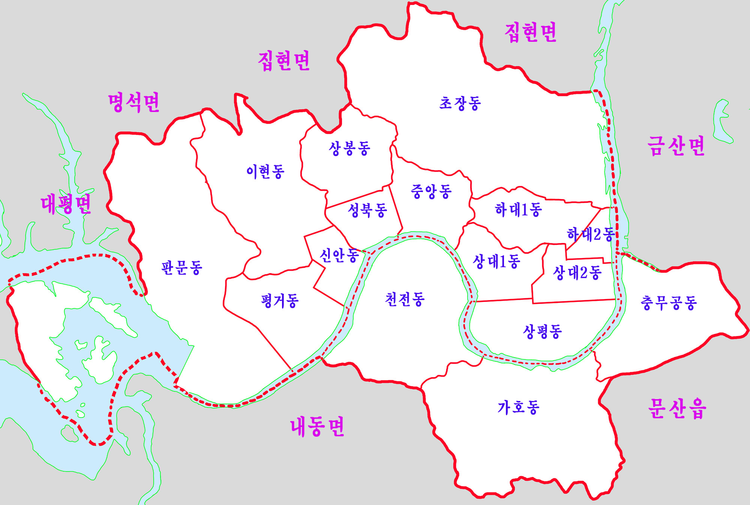

## **스타벅스 VS 이디야 비교**

http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015 (스타벅스 vs 이디야)

In [ ]:
# 스타벅스와 이디야만 포함된 새로운 데이터프레임을 생성
data = jinju.loc[jinju['상호명'].str.contains("스타벅스|이디야")].reset_index(drop=True) # 여기서 "스타벅스|이디야"는 "스타벅스 또는 이디야"를 의미
print(len(data))

## **Folium을 사용한 시각화**

In [ ]:
map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=13)  # 지도의 중심값

for n in data.index:
    # 팝업에 들어갈 내용.
    popup_name = data.loc[n, '상호명'] + ' - ' + str(data.loc[n, '위도']) +'/' + str(data.loc[n, '경도'])
    # 브랜드명에 따라 아이콘 색상을 다르게 나타내주는 옵션.
    if data.loc[n, '상호명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    
    folium.CircleMarker(
        location=[data.loc[n,'위도'], data.loc[n, '경도']],
        radius=8,
        popup=popup_name,
        color= icon_color,
        fill_color=icon_color,
        fill=True
    ).add_to(map)


map

In [ ]:
map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12, tiles='Stamen Toner')

for n in data.index:
    # 팝업에 들어갈 내용.
    popup_name = data.loc[n, '상호명'] + ' - ' + data.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상을 다르게 나타내주는 옵션.
    if data.loc[n, '브랜드명'] == '스타벅스' :
        icon_color = 'green'
    else:
        icon_color = 'blue'    
        
    folium.CircleMarker(
        location=[data.loc[n,'위도'], data.loc[n, '경도']],
        radius=8,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map

In [ ]:
!pip install haversine

In [ ]:
# 위도-경도 거리 계산법
from haversine import haversine, Unit

In [ ]:
a = (35.1605667696153, 128.106252843625) # 
b = (35.1641866273917, 128.11065945476)

haversine(a, b) # in kilometers

## **groupby()를 이용한 스타벅스 vs 이디야 비교**

In [ ]:
grouped_data = data.groupby(['시군구명', '브랜드명']).count()['numbers'].reset_index()
grouped_data.columns = ['시군구명','브랜드명','매장수']
grouped_data

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, y='시군구명', x='매장수', hue='브랜드명', palette='crest')
plt.xlabel("시군구명", fontweight='bold',fontsize= 15, labelpad = 20)
plt.ylabel("매장수", fontweight='bold',fontsize= 15, labelpad = 20)
#plt.xticks([0,2,4,6,8,10,12,14,16,18])

In [ ]:
district_data = data.groupby(['법정동명']).size().reset_index(name = '매장수')
district_data

## **던킨과 베스킨라빈스 비교**

In [ ]:
br_korea = jinju.loc[ jinju['상호명'].str.contains('베스킨|배스킨|던킨')].reset_index(drop=True)
br_korea

In [ ]:
baskin =  jinju.loc[ jinju['상호명'].str.contains("배스킨|베스킨")].reset_index(drop=True)

In [ ]:
dunkin =  jinju.loc[ jinju['상호명'].str.contains("던킨")].reset_index(drop=True)

In [ ]:
print(len(br_korea))
print(len(baskin))
print(len(dunkin))

In [ ]:
br_name_list = list(baskin['상호명'].unique())
br_name_list

In [ ]:
baskin_dictionary = {} # 빈 딕셔너리 생성
for name in br_name_list:
  if name != "배스킨라빈스":
    baskin_dictionary[name] = '배스킨라빈스'

In [ ]:
baskin_dictionary

In [ ]:
dk_name_list = list(dunkin['상호명'].unique())
dk_name_list

In [ ]:
dunkin_dictionary = {} # 빈 딕셔너리 생성
for name in dk_name_list:
  if name != "던킨":
    dunkin_dictionary[name] = '던킨'

In [ ]:
dunkin_dictionary

In [ ]:
baskin_dictionary.update(dunkin_dictionary)

In [ ]:
baskin_dictionary

In [ ]:
# 함수 생성
def name_corrector2(x):
  if x in baskin_dictionary:
    return baskin_dictionary[x]
  else:
    return x

In [ ]:
br_korea['브랜드명'] = br_korea['상호명'].apply(name_corrector2)

In [ ]:
br_korea # 상권업종중분류명에 차이가 있는 걸 발견

In [ ]:
df_br = br_korea['브랜드명'].value_counts().reset_index()
df_br.columns = ['브랜드명','Number']
df_br.head() #

In [ ]:
map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for n in br_korea.index:
    
    popup_name = br_korea.loc[n, '상호명'] + ' - ' + str(br_korea.loc[n, '위도']) +'/' + str(br_korea.loc[n, '경도'])
    #popup_name = br_korea.loc[n, '브랜드명'] + ' - ' + br_korea.loc[n, '도로명주소']
    
    if br_korea['브랜드명'][n] == '던킨' :
        icon_color = 'orange'
    else:
        icon_color = 'pink'    
    
    folium.Marker([br_korea.loc[n, '위도'], br_korea.loc[n, '경도']], 
                  popup=popup_name, 
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

# **공공데이터 분석 2**

https://kosis.kr/search/search.do?query=%EC%B6%9C%EC%83%9D%EC%95%84%EC%88%98 (통계청)

https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=INH_1B81A01&conn_path=I2 (데이터 출처)


## **데이터 불러오기**

In [ ]:
population = pd.read_csv("https://raw.githubusercontent.com/gnu-mot/student_club/main/%EC%8B%A4%EC%8A%B5%ED%8C%8C%EC%9D%BC_3%EC%A3%BC.csv",encoding = 'cp949')

In [ ]:
population.shape

In [ ]:
population.head() # 월 별 데이터

## **melt()를 이용한 데이터 재구조화**

자료출처: https://rfriend.tistory.com/278

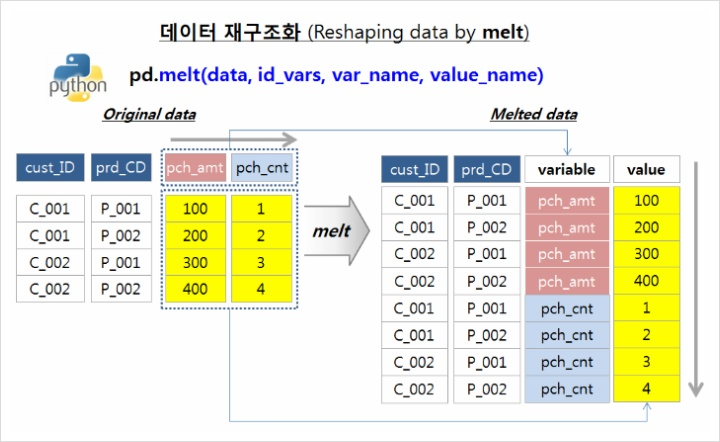

In [ ]:
df = population.melt(id_vars = '시군구별')
df

In [ ]:
df.shape

In [ ]:
df['시군구별'].unique()

In [ ]:
df.loc[df['시군구별'] == '시군구별'] # 이 내용은 필요 없음

## **데이터 정제**

In [ ]:
# != 같지 않은 경우를 의미
cleaned = df.loc[df['시군구별'] != '시군구별'].reset_index(drop=True)
cleaned

In [ ]:
cleaned.shape

In [ ]:
cleaned.isnull().sum()

In [ ]:
cleaned['시군구별'].unique()

In [ ]:
cleaned['variable'].str.split(".")

In [ ]:
cleaned['variable'].str.split(".", expand=True) # 데이터프레임 형태로 반환

In [ ]:
cleaned['variable'].str.split(".", expand=True)[0] # 여기서 주의 !!! 0은 인덱싱이 아니라, 컬럼을 선택 (컬럼의 이름이 0, 1, 2)

In [ ]:
cleaned['연도'] = cleaned['variable'].str.split(".", expand=True)[0]

In [ ]:
cleaned['월'] = cleaned['variable'].str.split(".", expand=True)[1]
cleaned['성별'] = cleaned['variable'].str.split(".", expand=True)[2]

In [ ]:
cleaned.head()

In [ ]:
cleaned.tail()

In [ ]:
cleaned['성별'].unique()

In [ ]:
cleaned['성별'] = cleaned['성별'].fillna("전체")
cleaned.head()

In [ ]:
cleaned['성별'] = cleaned['성별'].replace("1", "남자").replace("2", "여자")
cleaned.tail()

In [ ]:
cleaned['성별'].value_counts()

In [ ]:
cleaned = cleaned.rename(columns= {"variable":"날짜","value":"출생아수"})

In [ ]:
cleaned.info()

In [ ]:
cleaned['출생아수'] = cleaned['출생아수'].astype(int) # 에러가 난다

In [ ]:
cleaned[cleaned['출생아수'] == '-'] # 세종시는 자료가 누락 (세종시 설립이전의 데이터는 존재 하지 않음)

In [ ]:
import numpy as np
cleaned['출생아수'] = cleaned['출생아수'].replace("-", np.nan)

In [ ]:
cleaned.info()

In [ ]:
cleaned['출생아수'] = cleaned['출생아수'].astype(float)

In [ ]:
cleaned['출생아수'].describe()

## **전국 트렌드**

In [ ]:
cleaned.loc[(cleaned['시군구별'] == '전국')]

In [ ]:
df_all = cleaned.loc[(cleaned['시군구별'] == '전국') & (cleaned['성별'] == '전체')].reset_index(drop=True)
df_all

## **데이터 시각화**

In [ ]:
df_all.set_index(['연도','월']).plot(figsize=(16,6)) # 계절성을 띤다. (늘어났다 줄어들었다)

In [ ]:
aggregate = df_all.groupby('연도')['출생아수'].sum().reset_index(name='출생아수')
aggregate

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='연도',y='출생아수',data=aggregate)

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='연도',y='출생아수',data=df_all, ci=None, hue='월')

In [ ]:
df_all.set_index(['연도','월']).plot.bar(figsize=(16,6)) # 제대로 이해하기 힘듬

In [ ]:
df_all[-24:].set_index(['연도','월']).plot.bar(figsize=(16,6)) # 최근 2년의 데이터만 본다

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='연도',y='출생아수',data=aggregate, palette='YlGnBu_r')
plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("출생아수", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) 
plt.yticks(fontsize = 13)
plt.savefig("graph1.png", dpi=250)

In [ ]:
df_all.tail(24)

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='날짜',y='출생아수',data=df_all.tail(24), palette='YlGnBu_r')
plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("출생아수", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) #.
plt.yticks(fontsize = 13)  

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='날짜',y='출생아수',data=df_all.tail(36), palette='YlGnBu_r')
plt.xlabel("연도", fontweight='bold',fontsize= 15, labelpad = 25)
plt.ylabel("출생아수", fontweight='bold',fontsize= 15, labelpad = 25)
plt.xticks(fontsize = 13, rotation = 90) #.
plt.yticks(fontsize = 13)  

https://www.sjsori.com/news/articleView.html?idxno=52939 (출산율 문제)

In [ ]:
cleaned['시군구별'].unique()

In [ ]:
cleaned.head()

In [ ]:
local = cleaned.loc[(cleaned['시군구별'] == '경상남도') | (cleaned['시군구별'] == '부산광역시')].reset_index(drop=True)

In [ ]:
local

In [ ]:
plt.figure(figsize=(12,6))
sns.pointplot(data = local, x='연도',y='출생아수', hue='시군구별')

In [ ]:
local2 = cleaned.loc[(cleaned['시군구별'] != '전국')].reset_index(drop=True)
local2

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(data = local2, x='연도',y='출생아수', hue='시군구별')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
local3 = cleaned.loc[cleaned['시군구별'].isin(["경상남도","세종특별자치시", "부산광역시"])].reset_index(drop=True)
local3

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(data = local3, x = '연도' , y ='출생아수', hue = '시군구별' )

## **애니매이션을 통한 분석**

In [ ]:
cleaned

In [ ]:
selected = cleaned[cleaned['시군구별'].isin(["경상남도","경상북도", "대전광역시", "부산광역시"]) & (cleaned['성별']=='전체')].reset_index(drop=True)
selected

In [ ]:
grouped = selected.groupby(['시군구별',"연도"]).sum().reset_index()
grouped

In [ ]:
import plotly.express as px
import plotly

In [ ]:
state = grouped['시군구별']
date = grouped['연도']
numbers = grouped['출생아수']

In [ ]:
print(state, date, numbers)

In [ ]:
max(numbers)

In [ ]:
fig = px.bar(grouped, x=state,y=numbers, color=state, animation_frame=date,animation_group=state, range_y=[0,max(numbers)+30])
fig.update_layout(
    xaxis_title="지역", # title="Plot Title",
    yaxis_title="출생아수",
    legend_title="지역구분",
    font=dict(
        family="Open Sans",
        size=15,
        color="black"
    )
)
fig.update_xaxes(title_font=dict(size=18))
fig.update_yaxes(title_font=dict(size=18),tickfont_size=16)
fig.show()

In [ ]:
# html 파일로 저장
plotly.offline.plot(fig,filename='animated.html')